In [1]:
# Standard modules
import re
import json
import pickle as pkl
import numpy as np
from tabulate import tabulate
# RDKit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
# Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
# Bokeh
from bokeh.plotting import figure
from bokeh.layouts import gridplot
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [2]:
# Load data from json file into dictionary
with open('raw/data_coronene_4sets_0.6.json', 'rb') as file:
    dict = json.load(file)

In [3]:
# Get the name IDs for all molecules
ids = list(dict[0].keys())
# First molecule name ID in list
name = ids[26]
print(name)

R_eOH_0_eCOOH__0_eEPOXY_0_eCHO_0_eKETO_2_iOH_0_iEPOXY_2_ieEPOXY_1_1


In [4]:
# dict[0] contains the SMILES for the molecule
print(dict[0][name])

# remove the unnecessary carbon indexes from SMILES
#for i in dict[0]:
#    smiles = dict[0][i]
#    smiles = re.sub(r'\:\d+\]', ']', smiles)
#    dict[0][i] = smiles

[C:0]123[C:2]4([C:1](=[O:4])[CH2:25][C:24]56[C:22]1([C:18]1=[C:14]7[c:9]8[c:5]2[c:7]([cH:8][cH:10][c:11]8[C:12](=[O:13])[CH:15]=[C:16]7[CH2:17][CH:19]2[C:20]1([CH:21]=[CH:23]5)[O:28]2)[CH:6]=[CH:3]4)[O:27]6)[O:26]3


In [5]:
# dict[1] contains all the individual atomic spectra
spec = dict[1][name]
# with each key being the atom index
print(spec.keys())

dict_keys(['5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '0', '1', '2', '3', '4'])


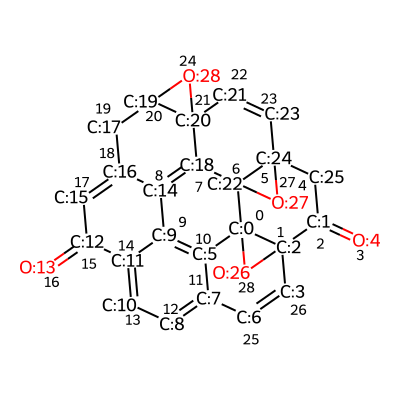

In [6]:
IPythonConsole.drawOptions.addAtomIndices=True
IPythonConsole.drawOptions.annotationFontScale=0.8
IPythonConsole.molSize = 400,400
# Show the molecule with RDKit
mol = Chem.MolFromSmiles(dict[0][name])
mol

In [7]:
#i = 0
#for atom in mol.GetAtoms():
#    if atom.GetAtomicNum() == 6:
#        atom.SetProp("atomLabel", f"{i}")
#        i = i + 1

#mol

In [8]:
#for atom in mol.GetAtoms():
#    neigh = atom.GetNeighbors()

#    for at in neigh:
#        if at.GetAtomicNum() == 8:
#            print(atom.GetProp("atomLabel"))

In [9]:
carbons = 0
features = np.zeros([3, 3, 2, 2])

# Loop through all molecules in datasets
for i in ids:
    smiles = dict[0][i]
    mol = Chem.MolFromSmiles(smiles)
    for atom in mol.GetAtoms():
        if atom.GetAtomicNum() == 6:
            carbons += 1
            if atom.GetHybridization() == Chem.rdchem.HybridizationType.SP:
                if atom.GetTotalNumHs() == 0:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[0, 0, 0, 0] += 1
                        else:
                            features[0, 0, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[0, 0, 1, 0] += 1
                        else:
                            features[0, 0, 1, 1] += 1
                elif atom.GetTotalNumHs() == 1:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[0, 1, 0, 0] += 1
                        else:
                            features[0, 1, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[0, 1, 1, 0] += 1
                        else:
                            features[0, 1, 1, 1] += 1
                elif atom.GetTotalNumHs() == 2:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[0, 2, 0, 0] += 1
                        else:
                            features[0, 2, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[0, 2, 1, 0] += 1
                        else:
                            features[0, 2, 1, 1] += 1
            elif atom.GetHybridization() == Chem.rdchem.HybridizationType.SP2:
                if atom.GetTotalNumHs() == 0:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[1, 0, 0, 0] += 1
                        else:
                            features[1, 0, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[1, 0, 1, 0] += 1
                        else:
                            features[1, 0, 1, 1] += 1
                elif atom.GetTotalNumHs() == 1:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[1, 1, 0, 0] += 1
                        else:
                            features[1, 1, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[1, 1, 1, 0] += 1
                        else:
                            features[1, 1, 1, 1] += 1
                elif atom.GetTotalNumHs() == 2:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[1, 2, 0, 0] += 1
                        else:
                            features[1, 2, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[1, 2, 1, 0] += 1
                        else:
                            features[1, 2, 1, 1] += 1
            elif atom.GetHybridization() == Chem.rdchem.HybridizationType.SP3:
                if atom.GetTotalNumHs() == 0:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[2, 0, 0, 0] += 1
                        else:
                            features[2, 0, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[2, 0, 1, 0] += 1
                        else:
                            features[2, 0, 1, 1] += 1
                elif atom.GetTotalNumHs() == 1:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[2, 1, 0, 0] += 1
                        else:
                            features[2, 1, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[2, 1, 1, 0] += 1
                        else:
                            features[2, 1, 1, 1] += 1
                elif atom.GetTotalNumHs() == 2:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[2, 2, 0, 0] += 1
                        else:
                            features[2, 2, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[2, 2, 1, 0] += 1
                        else:
                            features[2, 2, 1, 1] += 1


In [10]:
print(f'Total number of carbons = {carbons}')
print('---')
print('Number of hydrogens bonded to carbon:')
print(f'0 Hs = {np.sum(features[:, 0, :, :])}')
print(f'1 Hs = {np.sum(features[:, 1, :, :])}')
print(f'2 Hs = {np.sum(features[:, 2, :, :])}')
print('---')
print('Hybridisation of carbon:') 
print(f'SP = {np.sum(features[0, :, :, :])}')
print(f'SP2 = {np.sum(features[1, :, :, :])}')
print(f'SP3 = {np.sum(features[2, :, :, :])}')
print('---')
print('Numer of aromatic carbons:')
print(f'True = {np.sum(features[:, :, 0, :])}')
print(f'False = {np.sum(features[:, :, 1, :])}')
print('---')
print('Is carbon in a ring:')
print(f'True = {np.sum(features[:, :, :, 0])}')
print(f'False = {np.sum(features[:, :, :, 1])}')
print('')
print(tabulate(
    [['Aromatic', features[0, 0, 0, 0], features[0, 0, 0, 1]],
     ['Non Aromatic', features[0, 0, 1, 0], features[0, 0, 1, 1]]],
     headers=['SP OH', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[1, 0, 0, 0], features[1, 0, 0, 1]],
     ['Non Aromatic', features[1, 0, 1, 0], features[1, 0, 1, 1]]],
     headers=['SP2 OH', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[1, 1, 0, 0], features[1, 1, 0, 1]],
     ['Non Aromatic', features[1, 1, 1, 0], features[1, 1, 1, 1]]],
     headers=['SP2 1H', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[2, 0, 0, 0], features[2, 0, 0, 1]],
     ['Non Aromatic', features[2, 0, 1, 0], features[2, 0, 1, 1]]],
     headers=['SP3 0H', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[2, 1, 0, 0], features[2, 2, 0, 1]],
     ['Non Aromatic', features[2, 1, 1, 0], features[2, 1, 1, 1]]],
     headers=['SP3 1H', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[2, 2, 0, 0], features[2, 2, 0, 1]],
     ['Non Aromatic', features[2, 2, 1, 0], features[2, 2, 1, 1]]],
     headers=['SP3 2H', 'Ring', 'Not Ring']
))

Total number of carbons = 7946
---
Number of hydrogens bonded to carbon:
0 Hs = 4513.0
1 Hs = 3147.0
2 Hs = 286.0
---
Hybridisation of carbon:
SP = 1.0
SP2 = 6257.0
SP3 = 1688.0
---
Numer of aromatic carbons:
True = 3698.0
False = 4248.0
---
Is carbon in a ring:
True = 7656.0
False = 290.0

SP OH           Ring    Not Ring
------------  ------  ----------
Aromatic           0           0
Non Aromatic       1           0

SP2 OH          Ring    Not Ring
------------  ------  ----------
Aromatic        2613           0
Non Aromatic    1067         172

SP2 1H          Ring    Not Ring
------------  ------  ----------
Aromatic        1085           0
Non Aromatic    1202         118

SP3 0H          Ring    Not Ring
------------  ------  ----------
Aromatic           0           0
Non Aromatic     660           0

SP3 1H          Ring    Not Ring
------------  ------  ----------
Aromatic           0           0
Non Aromatic     742           0

SP3 2H          Ring    Not Ring
----------

In [11]:
bonds = 0
b_features = np.zeros([3, 2, 2])

# Loop through all molecules in datasets
for i in ids:
    smiles = dict[0][i]
    mol = Chem.MolFromSmiles(smiles)
    # Loop through all bonds in molecule
    for bond in mol.GetBonds():
        bonds += 1
        # Count the types of bond
        if bond.GetBondType() == Chem.rdchem.BondType.SINGLE:
            if bond.GetIsConjugated():
                if bond.IsInRing():
                    b_features[0, 0, 0] += 1
                else:
                    b_features[0, 0, 1] += 1
            else:
                if bond.IsInRing():
                    b_features[0, 1, 0] += 1
                else:
                    b_features[0, 1, 1] += 1
        elif bond.GetBondType() == Chem.rdchem.BondType.DOUBLE:
            if bond.GetIsConjugated():
                if bond.IsInRing():
                    b_features[1, 0, 0] += 1
                else:
                    b_features[1, 0, 1] += 1
            else:
                if bond.IsInRing():
                    b_features[1, 1, 0] += 1
                else:
                    b_features[1, 1, 1] += 1
        elif bond.GetBondType() == Chem.rdchem.BondType.AROMATIC:
            if bond.GetIsConjugated():
                if bond.IsInRing():
                    b_features[2, 0, 0] += 1
                else:
                    b_features[2, 0, 1] += 1
            else:
                if bond.IsInRing():
                    b_features[2, 1, 0] += 1
                else:
                    b_features[2, 1, 1] += 1


In [12]:
print(f'Total number of bonds = {bonds}')
print('---')
print('Number of types of bond:')
print(f'Single = {np.sum(b_features[0, :, :])}')
print(f'Double = {np.sum(b_features[1, :, :])}')
print(f'Aromatic = {np.sum(b_features[2, :, :])}')
print('---')
print('Is bond conjugated:')
print(f'True = {np.sum(b_features[:, 0, :])}')
print(f'False = {np.sum(b_features[:, 1, :])}')
print('---')
print('Is bond in a ring:')
print(f'True = {np.sum(b_features[:, :, 0])}')
print(f'False = {np.sum(b_features[:, :, 1])}')
print('')
print(tabulate(
    [['Conjugated', b_features[0, 0, 0], b_features[0, 0, 1]],
     ['Non Conjugated', b_features[0, 1, 0], b_features[0, 1, 1]]],
     headers=['SINGLE', 'Ring', 'Not Ring']
))
print(' ')
print(tabulate(
    [['Conjugated', b_features[1, 0, 0], b_features[1, 0, 1]],
     ['Non Conjugated', b_features[1, 1, 0], b_features[1, 1, 1]]],
     headers=['DOUBLE', 'Ring', 'Not Ring']
))
print(' ')
print(tabulate(
    [['Conjugated', b_features[2, 0, 0], b_features[2, 0, 1]],
     ['Non Conjugated', b_features[2, 1, 0], b_features[2, 1, 1]]],
     headers=['AROMATIC', 'Ring', 'Not Ring']
))

Total number of bonds = 11959
---
Number of types of bond:
Single = 6152.0
Double = 1584.0
Aromatic = 4223.0
---
Is bond conjugated:
True = 7419.0
False = 4540.0
---
Is bond in a ring:
True = 10596.0
False = 1363.0

SINGLE            Ring    Not Ring
--------------  ------  ----------
Conjugated        1054         671
Non Conjugated    4197         230
 
DOUBLE            Ring    Not Ring
--------------  ------  ----------
Conjugated        1046         425
Non Conjugated      76          37
 
AROMATIC          Ring    Not Ring
--------------  ------  ----------
Conjugated        4223           0
Non Conjugated       0           0


In [13]:
import collections

test_dict = collections.defaultdict(list)

for i in ids:
    smiles = dict[0][i]
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    # Search through all atoms in molecule
    for atom in mol.GetAtoms():
        # Identify all carbons in molecule
        if atom.GetAtomicNum() == 6:
            # Look at the neighbouring atoms of carbon
            c_neigh = atom.GetNeighbors()
            # Identify carbons bonded to an oxygen
            for cn in c_neigh:
                if cn.GetAtomicNum() == 8:
                    # Get neighbours of the oxygen
                    o_neigh = cn.GetNeighbors()
                    # Look through o neighbours and idetify if bonded to H
                    for on in o_neigh:
                        if on.GetAtomicNum() == 1:
                            test_dict[i].append(atom.GetIdx())
    

In [14]:
print(list(dict[0].keys())[list(dict[0].values()).index('[c:0]12[c:2]3[cH:1][cH:24][c:23]4[c:21]1[c:17]1[c:13]5[c:9]6[c:11]([cH:12][cH:14][c:15]5[cH:16][c:18]([CH:25]=[O:28])[c:19]1[cH:20][cH:22]4)[CH2:10][CH:8]1[C:7]([C:5]26[OH:26])([CH:6]=[C:3]3[OH:4])[O:27]1')])

R_eOH_1_eCOOH__0_eEPOXY_0_eCHO_1_eKETO_0_iOH_1_iEPOXY_0_ieEPOXY_1_2


In [15]:
mol_name = 'R_eOH_1_eCOOH__0_eEPOXY_0_eCHO_1_eKETO_0_iOH_1_iEPOXY_0_ieEPOXY_1_2'

In [16]:
dict[1][mol_name].keys()

dict_keys(['6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '0', '1', '2', '3', '4', '5'])

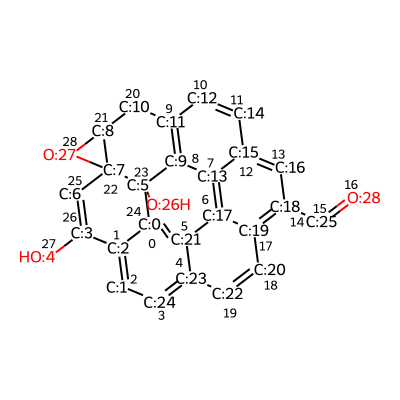

In [17]:
mol = Chem.MolFromSmiles(dict[0][mol_name])
mol

In [25]:
new_dict = {mol_name: {}}

print(new_dict)
print(new_dict[mol_name])

{'R_eOH_1_eCOOH__0_eEPOXY_0_eCHO_1_eKETO_0_iOH_1_iEPOXY_0_ieEPOXY_1_2': {}}
{}


In [28]:
o_count = 0

for atom in mol.GetAtoms():
    if atom.GetAtomicNum() == 8:
        o_count += 1
    if atom.GetAtomicNum() == 6:
        rd_idx = atom.GetIdx()
        print(rd_idx)

        map_num = atom.GetAtomMapNum()
        print(map_num)
    # Take into account the oxygens
    new_num = map_num - o_count
    # Get the related spectra
    old_spec = dict[1][mol_name][str(new_num)]
        
    new_dict[mol_name][rd_idx] = old_spec

0
0
1
2
2
1
3
24
4
23
5
21
6
17
7
13
8
9
9
11
10
12
11
14
12
15
13
16
14
18
15
25


KeyError: '25'

In [29]:
new_dict

{'R_eOH_1_eCOOH__0_eEPOXY_0_eCHO_1_eKETO_0_iOH_1_iEPOXY_0_ieEPOXY_1_2': {0: [2.185803909037701e-50,
   8.660452351213607e-49,
   3.244138502000954e-47,
   1.1489142877583341e-45,
   3.846850473848215e-44,
   1.2177339480553083e-42,
   3.6444244671000793e-41,
   1.0311810565725603e-39,
   2.758483122118394e-38,
   6.976460960633651e-37,
   1.6681282526427356e-35,
   3.770970543325813e-34,
   8.059466126905133e-33,
   1.6285040429243027e-31,
   3.111005939070267e-30,
   5.618783154274514e-29,
   9.594296497198678e-28,
   1.5488645211753372e-26,
   2.363976529511089e-25,
   3.411161813981523e-24,
   4.6536199724441195e-23,
   6.002178963903187e-22,
   7.319078387805399e-21,
   8.437878916403018e-20,
   9.196860769612835e-19,
   9.477097900216434e-18,
   9.232951506650379e-17,
   8.50423346947026e-16,
   7.405582540410429e-15,
   6.096951095554681e-14,
   4.745649163784065e-13,
   3.492271325029336e-12,
   2.4296838098462895e-11,
   1.5981626397637982e-10,
   9.938517813909657e-10,
   5.84

<function matplotlib.pyplot.show(close=None, block=None)>

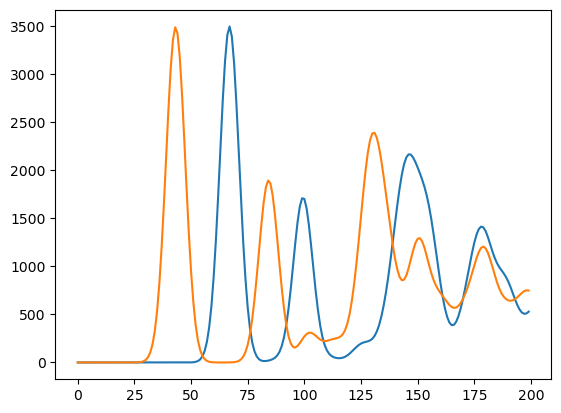

In [37]:
#for x in d_num:
# C=C
plt.plot(dict[1][mol_name]['1'])
plt.plot(dict[1][mol_name]['23'])
# C=C
#plt.plot(dict[1][mol_name]['11'])
#plt.plot(dict[1][mol_name]['13'])
plt.show


dict_keys(['5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '0', '1', '2', '3', '4'])


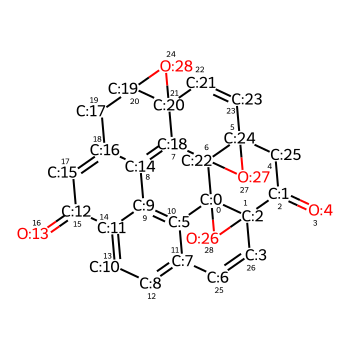

In [21]:
print(dict[1][mol_name].keys())
mol = Chem.MolFromSmiles(dict[0][mol_name])
mol

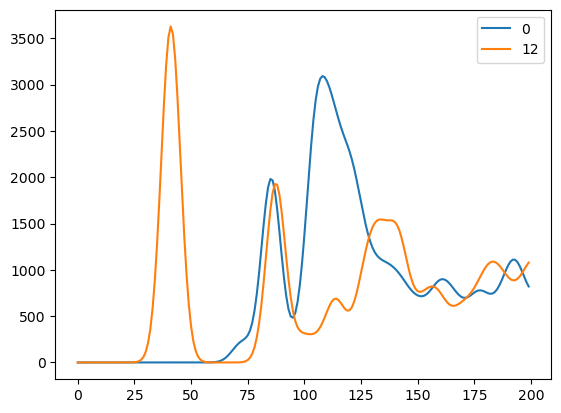

In [57]:
plt.plot(dict[1][mol_name]['14'], label='0')
plt.plot(dict[1][mol_name]['15'], label='12')
#plt.plot(dict[1][mol_name]['23'])
#plt.plot(dict[1][mol_name]['5'])
plt.legend()
plt.show()

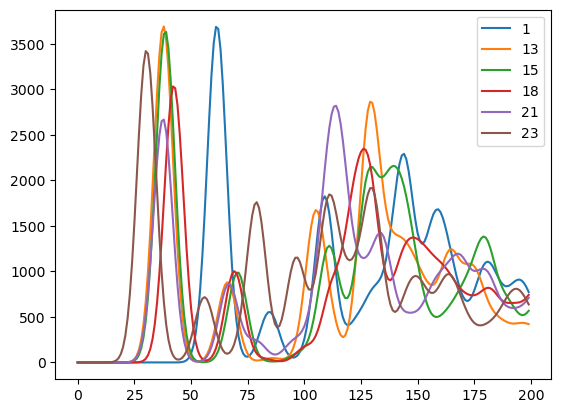

In [19]:
plt.plot(dict[1]['R_eOH_4_eCOOH__0_eEPOXY_0_eCHO_0_eKETO_1_iOH_0_iEPOXY_0_ieEPOXY_0_1']['1'], label='1')
#plt.plot(dict[1]['R_eOH_4_eCOOH__0_eEPOXY_0_eCHO_0_eKETO_1_iOH_0_iEPOXY_0_ieEPOXY_0_1']['3'], label='3')
plt.plot(dict[1]['R_eOH_4_eCOOH__0_eEPOXY_0_eCHO_0_eKETO_1_iOH_0_iEPOXY_0_ieEPOXY_0_1']['13'], label='13')
plt.plot(dict[1]['R_eOH_4_eCOOH__0_eEPOXY_0_eCHO_0_eKETO_1_iOH_0_iEPOXY_0_ieEPOXY_0_1']['15'], label='15')
plt.plot(dict[1]['R_eOH_4_eCOOH__0_eEPOXY_0_eCHO_0_eKETO_1_iOH_0_iEPOXY_0_ieEPOXY_0_1']['18'], label='18')
plt.plot(dict[1]['R_eOH_4_eCOOH__0_eEPOXY_0_eCHO_0_eKETO_1_iOH_0_iEPOXY_0_ieEPOXY_0_1']['21'], label='21')
#plt.plot(dict[1]['R_eOH_4_eCOOH__0_eEPOXY_0_eCHO_0_eKETO_1_iOH_0_iEPOXY_0_ieEPOXY_0_1']['22'], label='22')
plt.plot(dict[1]['R_eOH_4_eCOOH__0_eEPOXY_0_eCHO_0_eKETO_1_iOH_0_iEPOXY_0_ieEPOXY_0_1']['23'], label='23')
plt.legend()
plt.show()

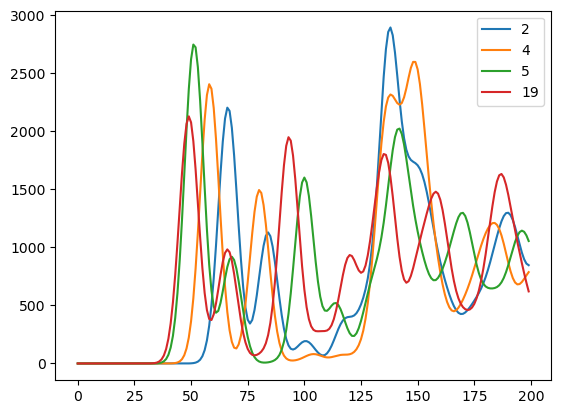

In [20]:
plt.plot(dict[1]['R_eOH_4_eCOOH__0_eEPOXY_0_eCHO_0_eKETO_1_iOH_0_iEPOXY_0_ieEPOXY_0_1']['2'], label='2')
plt.plot(dict[1]['R_eOH_4_eCOOH__0_eEPOXY_0_eCHO_0_eKETO_1_iOH_0_iEPOXY_0_ieEPOXY_0_1']['4'], label='4')
plt.plot(dict[1]['R_eOH_4_eCOOH__0_eEPOXY_0_eCHO_0_eKETO_1_iOH_0_iEPOXY_0_ieEPOXY_0_1']['5'], label='5')
plt.plot(dict[1]['R_eOH_4_eCOOH__0_eEPOXY_0_eCHO_0_eKETO_1_iOH_0_iEPOXY_0_ieEPOXY_0_1']['19'], label='19')
plt.legend()
plt.show()

In [13]:
# Plot all CH2 groups
x = np.linspace(280, 300, 200)

plots = []
for i in range(24):
    p = figure()
    glyphs = [p.line(x, spec[str(i)])]
    plots.append(p)


grid = gridplot(
    [plots[3], plots[0], plots[1], plots[12],
     plots[15], plots[2], plots[5], plots[13],
     plots[16], plots[4], plots[7], plots[17],
     None, plots[6], plots[9], plots[18],
     None, plots[8], plots[11], None,
     None, plots[10], plots[19], None,
     None, plots[14], plots[21], None,
     None, plots[20], plots[23], None,
     None, plots[22], None, None], 
    ncols=4, width=300, height=300
)

show(grid)